In [2]:
import os

import numpy as np
import networkx as nx
import pandas as pd
import community
import matplotlib.pyplot as plt
datapath = "..\data"

In [3]:
G_book = nx.read_gpickle(os.path.join(datapath, "book.nxgraph"))
G_reddit = nx.read_gpickle(os.path.join(datapath, "asoiaf_data_cleaned.nxgraph"))

# Perform community detection on the book graph

Modularity: 0.16879966414830913


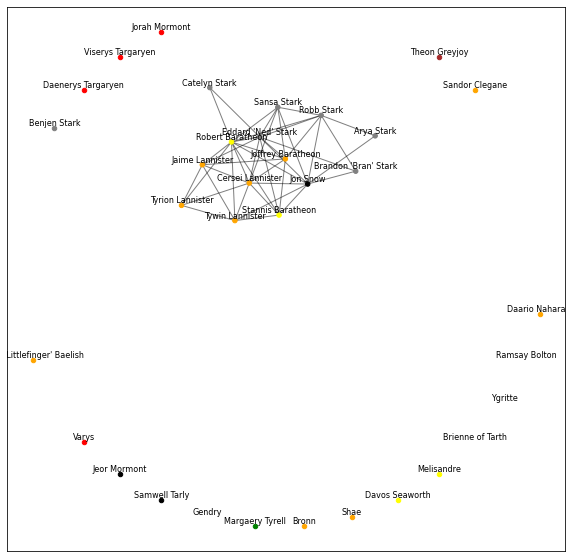

In [7]:
# Remove weaker edges from the graph
G_book_clean = G_book.copy()
book_weight_cutoff = 0.22
G_book_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_book_clean,'weight').items() if w < book_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_book_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_book_clean)
count = 0.
parts = []
for com, i in enumerate(set(partition.values())):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    parts.append(list_nodes)
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book_clean, parts)}")
nx.draw_networkx_edges(G_book_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_book_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Community detection on the reddit graph

Modularity: 0.0177723150721676


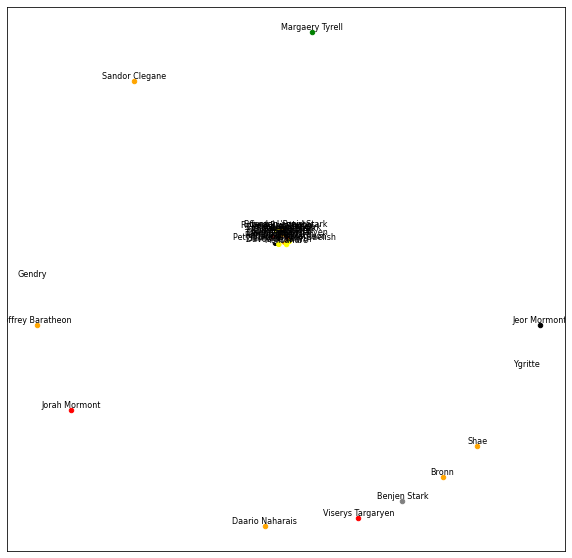

In [72]:
# Remove weaker edges from the graph
G_reddit_clean = G_reddit.copy()
reddit_weight_cutoff = 0.015
G_reddit_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_reddit_clean,'weight').items() if w < reddit_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_reddit_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_reddit_clean)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit_clean, parts)}")
nx.draw_networkx_edges(G_reddit_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_reddit_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Expected "optimal" split for the book graph

483
80
Modularity: 0.020718997512581702


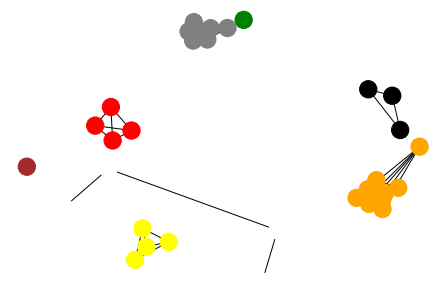

In [69]:
# Make list of sets, where each set is a grouping of a faction
node_color = [nx.get_node_attributes(G_book, "colour")[c] for c in G_book.nodes]
factions = pd.Series(range(len(node_color))).groupby(node_color, sort=False).apply(list).tolist()
for faction in factions:
    for i, index in enumerate(faction):
        faction[i] = list(G_book.nodes)[index]
#print(factions)

#partition = {}
#for i, faction in enumerate(factions):
#    for fact in faction:
#        partition[fact] = i
#print(partition)

G_book_faction = G_book.copy()
print(len(G_book.edges))
for a, b in G_book_faction.edges:
    same_faction = False
    for faction in factions:
        if a in faction and b in faction:
            same_faction = True
    if not same_faction:
        G_book_faction.remove_edge(a, b)
print(len(G_book_faction.edges))
print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book, factions)}")
nx.draw(G_book_faction, node_color = node_color)

# Expected "optimal" split for the reddit graph

561
87
Modularity: 0.006681436353882254


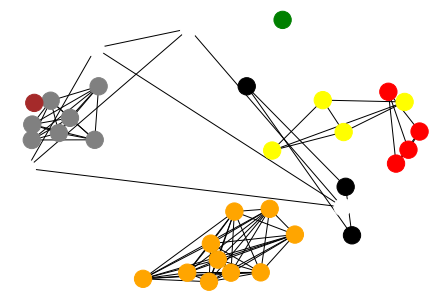

In [71]:
# Make list of sets, where each set is a grouping of a faction
node_color = [nx.get_node_attributes(G_reddit, "colour")[c] for c in G_reddit.nodes]
factions = pd.Series(range(len(node_color))).groupby(node_color, sort=False).apply(list).tolist()
for faction in factions:
    for i, index in enumerate(faction):
        faction[i] = list(G_reddit.nodes)[index]
#print(factions)

#partition = {}
#for i, faction in enumerate(factions):
#    for fact in faction:
#        partition[fact] = i
#print(partition)

G_reddit_faction = G_reddit.copy()
print(len(G_reddit.edges))
for a, b in G_reddit_faction.edges:
    same_faction = False
    for faction in factions:
        if a in faction and b in faction:
            same_faction = True
    if not same_faction:
        G_reddit_faction.remove_edge(a, b)
print(len(G_reddit_faction.edges))
print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit, factions)}")
nx.draw(G_reddit_faction, node_color = node_color)